<a href="https://colab.research.google.com/github/kimnamgyo/kimnamgyo.github.io/blob/master/practice_classification_1(2019250004_%EA%B9%80%EB%82%A8%EA%B5%90)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (실습) 분류 1부

**참고**

[(구글코랩) 분류](https://colab.research.google.com/github/codingalzi/handson-ml3/blob/master/notebooks/code_classification.ipynb)
의 소스코드를 먼저 공부하세요.

**문제 1**

타이타닉 데이터 분석 경진대회에 도전하는 과제입니다.

연습문제 3번에 해당하는 문제라서 주피터 노트북에 해답이 있기는 합니다.
그런데 여러분이 해야 할일은 아래 링크에 들어가서 성적을 받아오는 겁니다.

[Titanic - Machine Learning from Disaster | Kaggle](https://www.kaggle.com/c/titanic)

- 제출 내용: 캐글 타이타닉 경진대회(competition)에 참가해서 작성한 캐글 주피터 노트북 주소 및 등수 사진 캡처

- 참고 자료: 구글 검색에서 "캐글 타이타닉 competition" 으로 검색하면 많은 블로그의 글이 검색됨.
    그중 아래 두 개 사이트가 읽을만함.

    - [Kaggle과 Titanic research로 시작하는 데이터 분석 - Ascent Dev Blog (ascentnet.co.jp)](https://developers.ascentnet.co.jp/2017/11/24/kaggle-process-review/)    
    - [캐글 타이타닉 생존자 예측 도전기 (1) - Cyc1am3n's Blog](https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html)

**캐글 주피터 노트북 주소** : https://www.kaggle.com/code/kimnamgyo/notebookaafe65f8d1

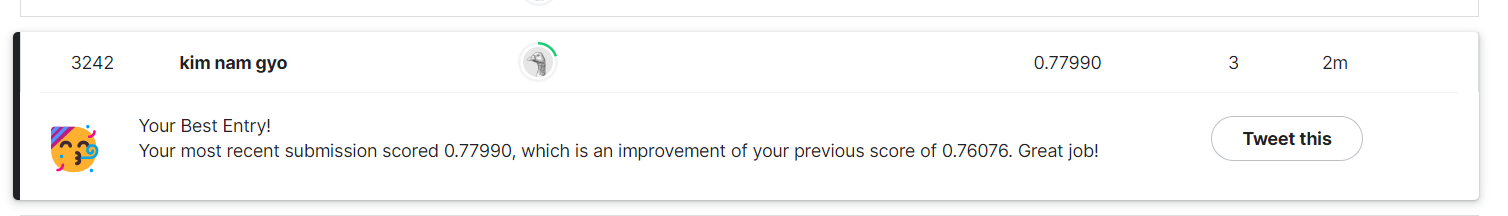

**문제 2**

[(구글코랩) 분류](https://colab.research.google.com/github/codingalzi/handson-ml3/blob/master/notebooks/code_classification.ipynb) 의 
맨 아래에 있는 연습문제 1번부터 4번까지를 따라하면서 내용을 정리하라.

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
import sklearn

assert sklearn.__version__ >= "1.0.1"

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

적재된 객체는 사전 자료형에 기타 속성(`data`, `target` 등)이 추가된 `Bunch` 자료형이다.

In [ ]:
type(mnist)

sklearn.utils._bunch.Bunch

`Bunch` 자료형은 다양한 속성을 갖고 있다.
여기서는 입력 데이터셋(`data`)과 타깃 데이터셋(`target`) 속성만 활용한다.
나머지 속성은 데이터셋 관련 기타 정보를 저장한다.

In [ ]:
mnist.keys()  # Bunch 자료형 속성

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

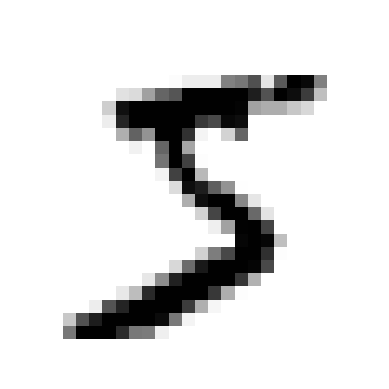

In [ ]:
import matplotlib.pyplot as plt

# 28x28 모양의 2차원 어레리로 변환 후 이미지 그리기
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# 첫째 이미지 그리기
some_digit = X[0]
plot_digit(some_digit)
plt.show()

## 이진 분류기 훈련

**숫자-5 감지기 훈련**

이미지가 숫자 5를 표현하는지 여부만을 판단하는 이진 분류기의 훈련을 위해 레이블을 0 또는 1로 변경한다.

* 0: 숫자 5 아님.
* 1: 숫자 5 맞음.

In [ ]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

##  분류기 성능 측정

###  교차 검증 활용 정확도 측정

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

**참고**

성능 평가 점수 등이 책의 내용과 조금 다를 수 있지만, 어떤 문제가 있는 것은 아니다. 
결과가 조금씩 달라지는 이유는 아래와 같다.

* 첫째, 사이킷런과 다른 라이브러리들이 발전하면서 알고리즘이 조금씩 변경되기 때문에 얻어지는 값이 바뀔 수 있다. 
* 둘째, 많은 훈련 알고리즘이 확률적, 즉 무작위성에 의존한다. 
    이론적으로 `random_state=42`나 `np.random.seed(42)` 등
    난수 생성기에 시드를 지정하여 일관된 결과를 얻을 수 있지만 항상 보장되지는 않는다. 
* 셋째, 훈련 알고리즘이 여러 스레드(C로 구현된 알고리즘)나 여러 프로세스(예를 들어 n_jobs 매개변수를 사용할 때)로 
    실행되면 연산이 실행되는 정확한 순서가 항상 보장되지 않으며, 따라서 결괏값이 조금 다를 수 있다.
* 넷째, 파이썬 사전(dict)이나 셋(set) 객체는 항목을 사용하는 순서가 경우에 따라 달라질 수 있다.

#### 3.3.2.1. 오차 행렬

교차 검증을 이용하여 예측을 수행하고,

이를 이용하여 오차 행렬을 생성한다.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

위 결과는 다음을 보여준다.

```
TN | FP
---|---
FN | TP
```

* TN: 참 음성 개수. 즉, 5가 아닌 이미지를 5가 아니라고 정확하게 예측한 경우의 수
* FP: 거짓 양성 개수. 즉, 5가 아닌 이미지를 5라고 잘못 예측한 경우의 수
* FN: 거짓 음성 개수. 즉, 5를 나타내는 이미지를 5가 아니라고 잘못 예측한 경우의 수
* TP: 참 양성 개수. 즉, 5를 나타내는 이미지를 5라고 정확하게 예측한 경우의 수

* 정밀도

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

* 재현율

In [ ]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

* F<sub>1</sub> 점수

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

#### 3.3.2.3. 정밀도/재현율 트레이드오프

정밀도와 재현율은 상호 반비례 관계다. 따라서 정밀도와 재현율 사이의 적절한 비율을 유지하는 분류기를 찾아야 한다. 정밀도와 재현율의 비율은 결정 임곗값에 의해 결정된다.

**결정 임곗값, 정밀도, 재현율 그래프 그리기**

- 결정 함수를 이용해서 교차검증을 실행하면 각 샘플에 대한 결정 함수의 값으로 구성된 어레이 생성

- 분류기마다 결정 함수로 사용되는 메서드 제공

- `SGDClassifier`는 `decision_function()` 메서드를 결정 함수로 이용하며, 각 샘플마다 점수 계산. 기본 임계값은 0.

- 즉 결정 함숫값이 0보다 작으면 음성, 0보다 같거나 크면 양성으로 판정

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
len(y_scores)

60000

- `precision_recall_curve()` 함수를 이용하여 결정 임계값의 변화에 따른 정밀도와 재현율 확인

    - precisions: 60,001 개의 정밀도: 지정된 결정 임계값에 따른 정밀도. 마지막 항목으로 1 추가.
    - recalls: 60,001 개의 재현율: 지정된 결정 임계값에 따른 재현율. 마지막 항목으로 0 추가.
    - thresholds: 60,000 개의 결정 임계값. 각각의 결정 임계값에 맞춰 정밀도와 재현율 계산.

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
len(precisions)

60001

In [ ]:
len(recalls)

60001

In [ ]:
len(thresholds)

60000

`thresholds`는 `y_scores`를 오름차순으로 정렬한 어레이이다.
아래 코드가 이점을 확인해준다.

In [ ]:
for i in range(60000):
    if y_scores[i] not in thresholds:
        print("그런 값 없어요")

print("모두 있어요!")

모두 있어요!


- 결정 임계값의 변화에 따른 정밀도와 재현율의 변화 그래프
    - x축: 결정 임계값
    - y축; 정밀도와 재현율. 두 리스트의 마지막 항목은 제외 필요.

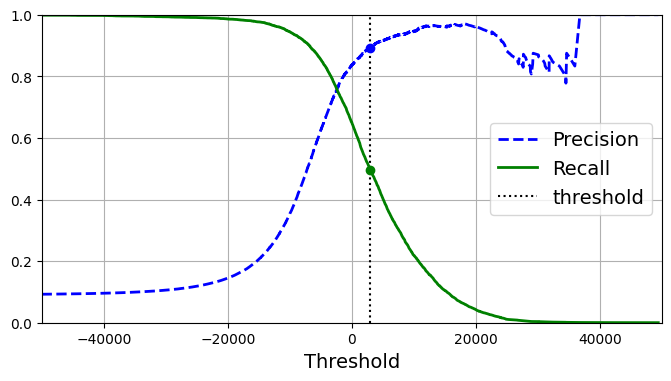

In [ ]:
plt.figure(figsize=(8, 4))  # 그래프 크기 지정

# 정밀도 그래프
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
# 재현율 그래프
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

# 결정 임계값이 3000인 경우 확인
threshold = 3000
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# 결정 임계값이 3000일 때의 정밀도와 재현율 표시
idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")

plt.axis([-50000, 50000, 0, 1])  # x축 구간
plt.grid()                       # 그리드 그리기
plt.xlabel("Threshold")          # x축 라벨
plt.legend(loc="center right")   # 범례 위치치

plt.show()

**재현율 대 정밀도 그래프 그리기**

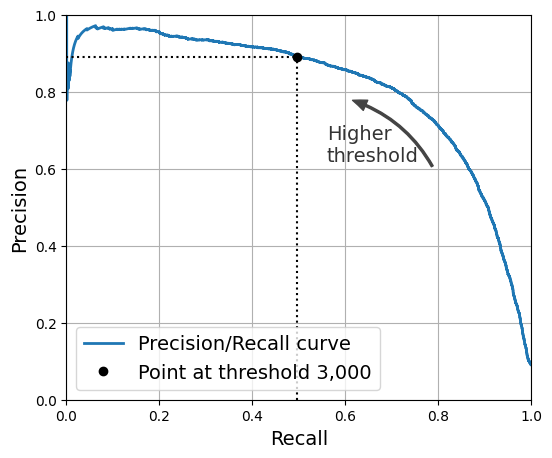

In [ ]:
import matplotlib.patches as patches  # 휘어진 화살표 그리기 용도

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# 결정 임계값이 3,000일 때의 정밀도, 재현율율 표시
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")

# 휘어진 화살표
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

# 휘어진 화살표 아내 문구 입력력
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

**(참고) 90% 정밀도 분류기 구현**

`SGDClassifier`는 0을 임곗값으로 사용한다. 
하지만 예를 들어 90% 정밀도를 지원하는 분류기 모델을 얻고자 한다면
다음과 같이 수동으로 구현할 수 있다.

아래 코드는 정밀도 90%가 달성되는 지점의 임곗값을 확인한다.

In [ ]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

실제로 바로 위에서 구해진 임곗값을 사용하면 정밀도가 90%인 모델을 얻게 된다.

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

하지만 그렇게 얻어진 모델의 재현율은 48% 정도로 떨어지기에 사용 목적에 적절한 모델인지 판단해야 한다.

In [ ]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

**ROC 곡선 그리기**

`roc_curve()` 함수는 임곗값의 변화에 따른 TPR, FPR 을 계산한다.
여기서는 계속해서 `SGDClassifier` 모델의 결정 함수가 생성한 값을
계속해서 사용한다.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

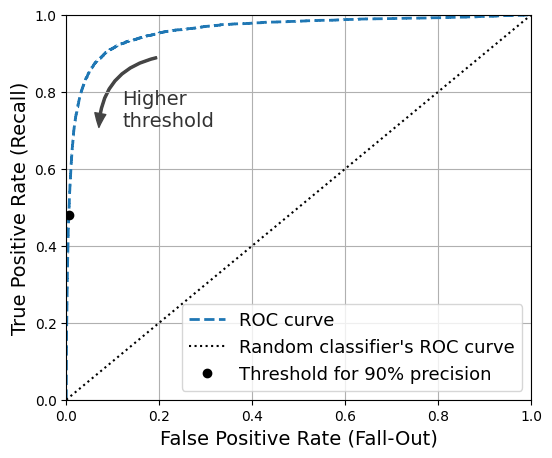

In [ ]:
plt.figure(figsize=(6, 5)) 

# ROC 커브 그리기
plt.plot(fpr, tpr, '--', linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

# 정밀도 90%의 위치 표시
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# 기타 요소 표시
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

ROC 커브의 아래 면적 AUC는 다음과 같이 0.96 정도이다.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

##  다중 클래스 분류

**`SVC` 모델 활용**

서포트 벡터 머신(SVM) 모델은 큰 데이터셋을 이용한 훈련이 매우 오래 걸린다.
따라서 훈련 시간을 줄이기 위해 `SVC` 모델은 기본적으로 일대일(OvO) 방식을 사용한다.

아래 코드는 훈련시간을 줄이기 위해 일부러 2,000 개의 훈련 샘플만을 대상으로 서포트 벡터 머신을 훈련시킨다.

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5

SVC(random_state=42)

**일대일 또는 일대다 전략 선택**

이진 분류기를 일대일 전략 또는 일대다 전략으로 지정해서 학습하도록 만들 수 있다.

- `OneVsOneClassifier` 클래스: 일대일 전략 지원
- `OneVsRestClassifier` 클래스: 일대다 전략 지원

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

**다중 클래스 분류 모델 교차 검증**

MNIST의 경우 0부터 9까지 숫자가 균형 있게 분포되어 있어서 
정확도를 기준으로 교차 검증을 진행할 수 있다.

예를 들어, `SGDClassifier` 모델은 기본적으로 OvR(일대다) 방식을 사용하여 다중 클래스 분류를 진행한다.
그런데 MNIST에 대해 성능이 별로 높지 않다.
심지어 첫째 샘플에 대한 예측도 틀린다.

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

결정 함수의 점수도 매우 낮다.

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

정확도를 활용한 교차 검증 점수가 87% 정도로 그렇게 훌륭하지 않다.

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

하지만 표준화 스케일링만 해도 성능이 좀 더 향상된다.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

##  에러 분석

아래 코드는 교차 검증으로 훈련된 모델의 예측값을 계산한다.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

## 3.6. 다중 클래스 분류 일반화

### 3.6.1. 다중 레이블 분류

아래 코드는 각 숫자 이미지에 대해 7이상인지 여부와 홀수인지 여부를 동시에 판단하는 분류 모델을 구현한다.

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

**(참고) 다중 레이블 분류 모델 평가**

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [ ]:
# extra code – shows that we get a negligible performance improvement when we
#              set average="weighted" because the classes are already pretty
#              well balanced.
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
chain_clf.predict([some_digit])

array([[0., 1.]])

### 3.6.2. 다중 출력 분류

노이즈가 포함된 사진에서 원본 사진을 예측하는 분류 모델을 구현한다.

In [ ]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

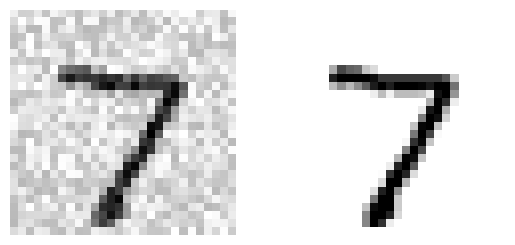

In [ ]:
# extra code – this cell generates and saves Figure 3–12
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])

plt.show()

예측값을 활용한 이미지는 거의 7에 가깝다.

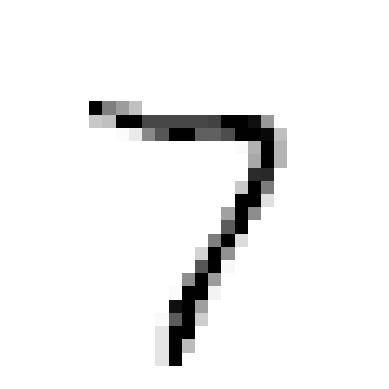

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)

plt.show()

### 1. 정확도 97% 성능의 MNIST 분류기

**문제**

테스트셋에 대한 정확도가 97% 이상 나오는 MNIST 분류기를 학습시킨다. 

힌트: `KNeighborsClassifier` 클래스가 꽤 잘 훈련된다. 대신 그리드 탐색을 이용하여 적절한 `weights`와 `n_neighbors` 하이퍼파라미터를 찾아야 한다.

- 기본 모델 훈련

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688


97%에 육박하는 정확도가 나온다.
성능을 보다 올리기 위해 그리드 탐색을 이용하여 최적의 하이퍼파라미터를 찾아 본다.

전체 훈련셋을 이용하면 그리드 탐색 훈련이 매우 오래 걸린다. 따라서 먼저 1만개의 훈련셋을 이용하여 그리드 탐색 훈련을 시도하고 이를 통해 최적의 하이퍼파라미터 조합을 찾는다.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.9441999999999998

성능이 떨어졌지만 이는 적은 훈련셋을 이용했기 때문이다. 그런데 찾은 최적의 모델을 전체 훈련셋에 대해 다시 훈련한 다음에 테스텟에 대한 정확도를 확인하면 97% 이상이 나온다.

In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

### 2. 데이터 증식(Data Augmentation)

**문제**

MNIST 손글씨 사진을 상, 하, 좌, 우 지정된 방향으로 픽셀 단위로 이동(shift)시키는 함수를 정의하라.

힌트: `scipy.ndimage` 모듈의 `shift()` 함수를 이용할 수 있다.
예를 들어, 아래 코드는 `image`가 가리키는 사진을 아래로 2픽셀, 오른쪽으로 1픽셀 이동시키고 빈자리의 픽셀값은 0으로 지정한다.

```
shift(image, [2, 1], cval=0)
```

이제 훈련 입력 샘플에 대해 상, 하, 좌, 우 각각 1픽셀씩 이동시킨 네 개의 샘플을 생성해서 훈련셋에 추가하라. 
그런 다음 앞서 학습된 최적의 모델을 확장된 훈련셋을 이용하여 다시 훈련한 다음에 테스트셋에 대한 정확도가 상승하는 것을 확인하라.

이와 같이 훈련셋을 확장하는 기법을 데이터 증식이라 한다.

In [ ]:
from scipy.ndimage import shift

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

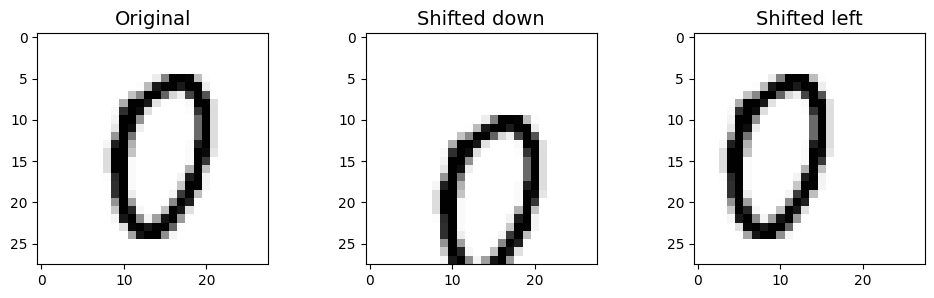

In [ ]:
image = X_train[1000]  # some random digit to demo
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

이제 모든 이미지를 왼쪽, 오른쪽, 위쪽 및 아래쪽으로 1픽셀 이동하여 증강된 교육 세트를 만들어 보겠습니다:

In [ ]:
import numpy as np

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

증강 교육 세트를 섞습니다. 그렇지 않으면 이동된 모든 이미지가 함께 그룹화됩니다:

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

이제 이전 연습에서 발견한 최상의 하이퍼 파라미터를 사용하여 모델을 교육하겠습니다:

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
augmented_accuracy = knn_clf.score(X_test, y_test)

단순히 데이터를 확대함으로써 정확도가 0.5% 향상되었습니다. 이는 그다지 인상적으로 들리지는 않지만 실제로는 오류율이 크게 떨어졌음을 의미합니다:

In [ ]:
error_rate_change = (1 - augmented_accuracy) / (1 - tuned_accuracy) - 1
print(f"error_rate_change = {error_rate_change:.0%}")

error_rate_change = -17%


데이터 확대 덕분에 오류율이 상당히 떨어졌습니다

### 3. Tackle the Titanic dataset


연습: _타이타닉 데이터 세트를 처리합니다. 시작하기에 좋은 장소는 [Kaggle](https://www.kaggle.com/c/titanic)입니다. 또는 https://homl.info/titanic.tgz 에서 데이터를 다운로드하여 2장의 하우징 데이터에 대해 했던 것처럼 이 tarball의 압축을 풀 수 있습니다. 그러면 두 개의 CSV 파일 _train.csv_와 _test.csv_가 제공됩니다. 이 파일은 'pandas.read_csv()lindo'를 사용하여 로드할 수 있습니다. 목표는 다른 열을 기반으로 "생존" 열을 예측할 수 있는 분류기를 훈련시키는 것입니다._

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [ ]:
train_data, test_data = load_titanic_data()

데이터가 이미 교육 세트와 테스트 세트로 분할되어 있습니다. 그러나 테스트 데이터에는 레이블이 *포함되지* 않습니다. 교육 데이터를 사용하여 최상의 모델을 교육한 다음 테스트 데이터에 대한 예측을 하고 Kaggle에 업로드하여 최종 점수를 확인하는 것이 목표입니다.

교육 세트의 상위 몇 줄을 살펴보겠습니다:

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


속성의 의미는 다음과 같습니다:
* **PassengerId**: 각 승객의 고유 식별자
* **Survived**: 그것이 목표입니다. 0은 승객이 살아남지 못했다는 것을 의미하고, 1은 승객이 살아남았다는 것을 의미합니다.
* **Pclass**: 승객 클래스.
* **Name**, **Sex**, **Age**: 자기설명
* **SibSp**: 타이타닉에 탑승한 승객의 형제자매와 배우자 수.
* **Parch**: 타이타닉에 탑승한 승객의 자녀와 부모 수.
* **Ticket**: 티켓 ID
* **Fare**: 지불된 가격(파운드)
* **Cabin**: 승객 객실 번호
* **Embarked**: 승객이 타이타닉에 탑승한 장소

목표는 승객의 나이, 성별, 승객 등급, 탑승 장소 등의 속성을 기반으로 승객의 생존 여부를 예측하는 것입니다.

'PassengerId' 열을 인덱스 열로 명시적으로 설정합니다

In [ ]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

누락된 데이터의 양을 확인하려면 다음과 같이 하십시오

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

**Age**, **Cabin** 및 **Embarked** 특성은 때때로 null(891개 미만의 null)이며, 특히 **Cabin**(77%가 null)입니다. 우리는 지금은 **Cabin**을 무시하고 나머지에 집중할 것입니다. **Age** 특성의 null 값은 약 19%이므로 이 값으로 수행할 작업을 결정해야 합니다. null 값을 중위수 연령으로 대체하는 것이 합리적인 것 같습니다. 다른 열을 기준으로 나이를 예측하면 조금 더 현명해질 수 있습니다(예: 중위 연령은 1등 37세, 2등 29세, 3등 24세). 하지만 우리는 단순하게 유지하고 전체 중위 연령을 사용할 것입니다.

**Name** 및 **Ticket** 속성은 일부 값을 가질 수 있지만 모델이 사용할 수 있는 유용한 숫자로 변환하기가 다소 까다로울 수 있습니다. 그래서 지금은, 우리는 그들을 무시할 것입니다.

수치 속성을 살펴보겠습니다:

In [ ]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 단 38%만이 **Survived**되었습니다. 이는 40%에 충분히 가깝기 때문에 정확도는 모델을 평가하는 데 합리적인 측정 기준이 될 것입니다.
* 평균 **Fare**는 £32.20으로, 그렇게 비싸지는 않은 것 같습니다(그러나 그 당시에는 아마도 큰 돈이었을 것입니다).
* 평균 **Age**는 30세 미만이었습니다.

목표값이 실제로 0 또는 1인지 확인합니다:

In [ ]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Jagained 속성은 승객이 탑승한 위치를 알려줍니다. C=Cherbourg, Q=Queensstown, S=Southampton.

이제 수치 속성을 위한 파이프라인부터 시작하여 전처리 파이프라인을 구축해 보겠습니다:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

이제 범주형 특성을 위한 파이프라인을 구축할 수 있습니다:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

마지막으로, 수치 및 범주형 파이프라인을 만들어 보겠습니다:

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

이제 원시 데이터를 가져와서 원하는 모든 기계 학습 모델에 제공할 수 있는 수치 입력 기능을 출력하는 훌륭한 전처리 파이프라인이 있습니다.

In [ ]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
y_train = train_data["Survived"]

이제 분류자를 교육할 준비가 되었습니다. "랜덤 포레스트 분류기"로 시작하겠습니다:

In [ ]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

이 모델은 교육을 받은 모델입니다. 이를 사용하여 테스트 세트에 대한 예측을 해 보겠습니다:

In [ ]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test)

이제 이러한 예측(Kaggle이 제외한 형식)을 사용하여 CSV 파일을 구축한 다음 업로드하여 최상의 결과를 기대할 수 있습니다. 하지만 잠깐! 우리는 희망보다 더 잘 할 수 있습니다. 교차 검증을 사용하여 모델이 얼마나 우수한지 파악해 보는 것은 어떨까요?

In [ ]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8137578027465668

Kaggle에서 열리는 타이타닉 대회의 [리더보드](https://www.kaggle.com/c/titanic/leaderboard)를 보면, 우리의 점수가 상위 2%에 있다는 것을 알 수 있습니다. 일부 카글러들은 100% 정확도에 도달했지만, 여러분은 [타이타닉의 희생자 목록](https://www.encyclopedia-titanica.org/titanic-victims/)을 쉽게 찾을 수 있기 때문에, 그들의 성능에 기계 학습이 거의 개입되지 않았을 가능성이 높습니다.

SVC를 사용해 보겠습니다:

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

그러나 10개의 교차 검증 접기에서 평균 정확도를 확인하는 대신, 각 모델에 대한 10개의 모든 점수를 하위 및 상위 사분위수를 강조하는 상자 그림과 점수의 범위를 보여주는 "whiskers"와 함께 표시합니다(이 시각화를 제안한 Nevin Yilmaz 덕분). 'boxplot()' 함수는 특이치("플라이어"라고 함)를 감지하며  whiskers에는 포함되지 않습니다. 특히, 하위 사분위수가 $Q_1$이고 상위 사분위수가 $Q_3$이면, 사분위수 범위 $IQR = Q_3 - Q_1$(이것은 상자 높이)이며, $Q_1 - 1.5 \times IQR$보다 낮은 점수는 플라이어이며, $Q3 + 1.5 \times IQR$보다 큰 점수도 마찬가지입니다.

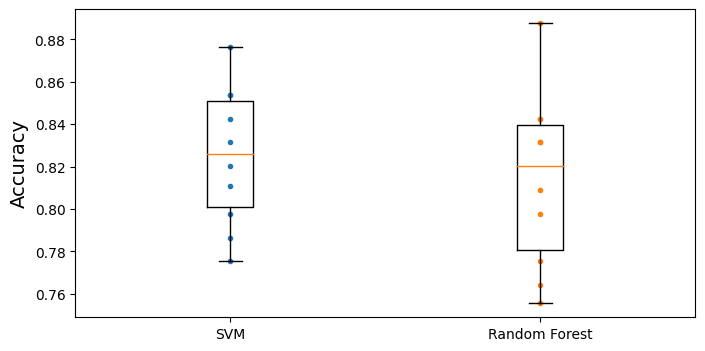

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")
plt.show()

랜덤 포레스트 분류기는 10개의 접힌 부분 중 하나에서 매우 높은 점수를 받았지만 전체적으로 평균 점수가 낮고 확산도 커 SVM 분류기가 일반화될 가능성이 더 높은 것으로 보입니다.

이 결과를 더욱 개선하기 위해 다음을 수행할 수 있습니다:
* 교차 검증 및 그리드 검색을 사용하여 더 많은 모델을 비교하고 하이퍼 파라미터를 조정합니다,
* 다음과 같이 피쳐 엔지니어링을 더 수행합니다:
* 숫자 속성을 범주형 속성으로 변환해 보십시오. 예를 들어, 연령 그룹에 따라 생존율이 매우 다르므로(아래 참조) 연령 버킷 범주를 만들어 연령 대신 사용하는 것이 도움이 될 수 있습니다. 마찬가지로, 30%만 생존했기 때문에 혼자 여행하는 사람들을 위한 특별한 범주를 갖는 것이 유용할 수 있습니다(아래 참조).
* **SibSp** 및 **Parch**를 합으로 바꿉니다.
* **Survived** 특성과 잘 연관된 이름 부분을 식별합니다.
* **cabin** 열을 사용합니다. 예를 들어, 첫 번째 문자를 사용하여 범주형 속성으로 처리합니다.

In [ ]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [ ]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(
    ['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


### 4. 스팸 분류기

연습: _스팸 분류기 만들기(더 어려운 연습):_


* _[Apache SpamAssassin 공개 데이터 세트](https://homl.info/spamassassin) 에서 스팸과 햄의 예를 다운로드합니다._
* _데이터 세트의 압축을 풀고 데이터 형식을 숙지합니다._
* _데이터 세트를 교육 세트와 테스트 세트로 나눕니다._
* _데이터 준비 파이프라인을 작성하여 각 이메일을 기능 벡터로 변환합니다. 준비 파이프라인은 전자 메일을 가능한 각 단어의 존재 여부를 나타내는 (희소) 벡터로 변환해야 합니다. 예를 들어 모든 전자 메일에 "Hello", "how", "are", "you" 등 네 단어만 포함되어 있는 경우 "Hello Hello"는 벡터 [1, 0, 0, 1]("Hello"가 있음, "how"가 없음, "you"가 없음, "you"가 있음을 의미) 또는 각 단어의 발생 횟수를 세는 [3, 0, 0, 2]로 변환됩니다._

_전자 메일 헤더 제거, 각 전자 메일을 소문자로 변환, 구두점 제거, 모든 URL을 "URL"로 바꾸거나, 모든 숫자를 "NUMBER"로 바꾸거나, _Steaming_(즉, 단어 끝 부분을 잘라내기 위해 사용 가능한 Python 라이브러리가 있음)을 제어하기 위해 준비 파이프라인에 하이퍼 파라미터를 추가할 수 있습니다._

_마지막으로, 몇 개의 분류기를 사용해보고 높은 리콜과 높은 정밀도로 훌륭한 스팸 분류기를 만들 수 있는지 확인해보세요._

In [ ]:
import tarfile

def fetch_spam_data():
    spam_root = "http://spamassassin.apache.org/old/publiccorpus/"
    ham_url = spam_root + "20030228_easy_ham.tar.bz2"
    spam_url = spam_root + "20030228_spam.tar.bz2"

    spam_path = Path() / "datasets" / "spam"
    spam_path.mkdir(parents=True, exist_ok=True)
    for dir_name, tar_name, url in (("easy_ham", "ham", ham_url),
                                    ("spam", "spam", spam_url)):
        if not (spam_path / dir_name).is_dir():
            path = (spam_path / tar_name).with_suffix(".tar.bz2")
            print("Downloading", path)
            urllib.request.urlretrieve(url, path)
            tar_bz2_file = tarfile.open(path)
            tar_bz2_file.extractall(path=spam_path)
            tar_bz2_file.close()
    return [spam_path / dir_name for dir_name in ("easy_ham", "spam")]

In [ ]:
ham_dir, spam_dir = fetch_spam_data()

다음으로 모든 전자 메일을 로드합니다:

In [ ]:
ham_filenames = [f for f in sorted(ham_dir.iterdir()) if len(f.name) > 20]
spam_filenames = [f for f in sorted(spam_dir.iterdir()) if len(f.name) > 20]

In [ ]:
len(ham_filenames)

2500

In [ ]:
len(spam_filenames)

500

Python의 '이메일' 모듈을 사용하여 다음 이메일을 구문 분석할 수 있습니다(헤더, 인코딩 등을 처리함):

In [ ]:
import email
import email.policy

def load_email(filepath):
    with open(filepath, "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [ ]:
ham_emails = [load_email(filepath) for filepath in ham_filenames]
spam_emails = [load_email(filepath) for filepath in spam_filenames]

ham과 스팸 메일의 예를 보고 데이터가 어떻게 생겼는지 알아봅시다.

In [ ]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [ ]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


일부 전자 메일은 실제로 이미지와 첨부 파일(자체 첨부 파일이 있을 수 있음)이 있는 다중 부분입니다. 다음과 같은 다양한 유형의 구조를 살펴보겠습니다:

In [ ]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        multipart = ", ".join([get_email_structure(sub_email)
                               for sub_email in payload])
        return f"multipart({multipart})"
    else:
        return email.get_content_type()

In [ ]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [ ]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [ ]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

스팸 메일은 꽤 많은 HTML을 가지고 있는 반면, 햄 메일은 더 일반적인 텍스트인 것 같습니다. 게다가 꽤 많은 수의 햄 메일은 PGP를 사용하여 서명되고 스팸은 없습니다. 간단히 말해서, 이메일 구조는 가지기에 유용한 정보인 것 같습니다.

이제 전자 메일 헤더를 살펴보겠습니다:

In [ ]:
for header, value in spam_emails[0].items():
    print(header, ":", value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

여기에는 보낸 사람의 이메일 주소(12a1mailbot1@web.de 가 수상해 보이는 등)와 같은 유용한 정보가 많이 포함되어 있을 것입니다. 하지만 여기서는 '제목' 헤더에만 집중하겠습니다:

In [ ]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

자, 이제 전처리 함수 작성을 시작하겠습니다. 먼저 HTML을 일반 텍스트로 변환하는 기능이 필요합니다. 이를 위한 가장 좋은 방법은 틀림없이 훌륭한 [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) 라이브러리를 사용하는 것이겠지만, 저는 이 프로젝트에 또 다른 의존성을 추가하는 것을 피하고 싶으므로, 정규 표현을 사용하여 빠르고 더러운 해결책을 해킹해 봅시다([honhoily radience]가 모든 enlio를 파괴하는 위험을 무릅쓰고)https://stackoverflow.com/a/1732454/38626)) . 다음 함수는 먼저 "<head>" 섹션을 삭제한 다음 모든 "<a>" 태그를 하이퍼링크로 변환한 다음 HTML 태그를 모두 제거하고 일반 텍스트만 남깁니다. 또한 가독성을 위해 여러 줄의 줄을 하나의 줄로 바꾸고 마지막으로 HTML 엔티티(예: "&gt;" 또는 "&nbsp;")를 해제합니다:

In [ ]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

효과가 있는지 확인해 보겠습니다. HTML 스팸입니다:

In [ ]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

다음은 일반 텍스트입니다:

In [ ]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

이제 이메일을 입력으로 받아들이고 이메일의 내용을 일반 텍스트로 반환하는 함수를 작성해 보겠습니다:

In [ ]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [ ]:
print(email_to_text(sample_html_spam)[:100], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


약간의 단서를 넣읍시다! Natural Language Toolkit([NLTK](http://www.nltk.org/)) :

In [ ]:
import nltk

stemmer = nltk.PorterStemmer()
for word in ("Computations", "Computation", "Computing", "Computed", "Compute",
             "Compulsive"):
    print(word, "=>", stemmer.stem(word))

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


우리는 또한 URL을 "URL"이라는 단어로 대체하는 방법이 필요할 것입니다. 이를 위해 하드코어 [정규식](https://mathiasbynens.be/demo/url-regex) )를 사용할 수 있지만 [urlextract](https://github.com/lipoja/URLExtract) 라이브러리:

In [ ]:
# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# if running this notebook on Colab or Kaggle, we just pip install urlextract
if IS_COLAB or IS_KAGGLE:
    %pip install -q -U urlextract

**참고:** Jupyter 노트북에서는 항상 "!pip"이 잘못된 환경에 라이브러리를 설치할 수 있으므로 "!pip" 대신 "%pip"을 사용하십시오. 반면 "%pip"은 라이브러리가 현재 실행 중인 환경에 설치되어 있는지 확인합니다.

In [ ]:
import urlextract # may require an Internet connection to download root domain
                  # names

url_extractor = urlextract.URLExtract()
some_text = "Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"
print(url_extractor.find_urls(some_text))

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


우리는 이메일을 워드 카운터로 변환하는 데 사용할 이 모든 것을 변압기에 넣을 준비가 되어 있습니다. 단어 경계에 공백을 사용하는 Python의 'split()' 메서드를 사용하여 문장을 단어로 분할합니다. 이것은 많은 필기 언어에 적용되지만 전부는 아닙니다. 예를 들어, 중국어와 일본어 대본은 일반적으로 단어 사이에 공백을 사용하지 않고, 베트남어는 음절 사이에도 공백을 사용하는 경우가 많습니다. 이 연습에서는 데이터 세트가 (대부분이) 영어로 되어 있기 때문에 괜찮습니다.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True,
                 remove_punctuation=True, replace_urls=True,
                 replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

몇 가지 이메일을 통해 이 변환환기를 사용해 보겠습니다:

In [ ]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

이제 단어 카운트를 벡터로 변환해야 합니다. 이를 위해 'fit()' 메서드가 어휘(가장 일반적인 단어의 정렬된 목록)를 구축하고 'transform()' 메서드가 어휘를 사용하여 단어 수를 벡터로 변환하는 또 다른 변압기를 구축합니다. 출력은 희소 행렬입니다.

In [ ]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1
                            for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)),
                          shape=(len(X), self.vocabulary_size + 1))

In [ ]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [ ]:
X_few_vectors.toarray()

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [99, 11,  9,  8,  3,  1,  3,  1,  3,  2,  3],
       [67,  0,  1,  2,  3,  4,  1,  2,  0,  1,  0]])

이 행렬은 무엇을 의미합니까? 두 번째 줄의 첫 번째 열에 있는 99개의 단어는 두 번째 이메일에 어휘의 일부가 아닌 99개의 단어가 포함되어 있다는 것을 의미합니다. 옆에 있는 11은 이 이메일에 어휘의 첫 번째 단어가 11번 있다는 것을 의미합니다. 그 옆에 있는 9는 두 번째 단어가 9번이나 있다는 것을 의미합니다. 여러분은 우리가 어떤 단어를 말하고 있는지 알기 위해 어휘를 볼 수 있습니다. 첫 번째 단어는 "the", 두 번째 단어는 "of" 등입니다.

In [ ]:
vocab_transformer.vocabulary_

{'the': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'url': 5,
 'all': 6,
 'in': 7,
 'christian': 8,
 'on': 9,
 'by': 10}

이제 첫 번째 스팸 분류기를 교육할 준비가 되었습니다! 전체 데이터셋을 혁신해 보겠습니다:

In [ ]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3)
score.mean()

0.985

98.5% 이상으로, 처음 시도하기에는 나쁘지 않습니다! :) 그러나 우리는 "쉬운" 데이터 세트를 사용하고 있다는 것을 기억하십시오. 더 어려운 데이터셋을 사용해 볼 수 있습니다. 결과는 그리 놀랍지 않을 것입니다. 여러 모델을 시도하고, 가장 적합한 모델을 선택한 후 교차 검증을 사용하여 미세 조정해야 합니다.

하지만 그림을 이해할 수 있으므로 이제 그만 두고 테스트 세트에 표시된 정밀도/호출 정보만 출력합니다:

In [ ]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print(f"Precision: {precision_score(y_test, y_pred):.2%}")
print(f"Recall: {recall_score(y_test, y_pred):.2%}")

Precision: 96.88%
Recall: 97.89%
